In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import lightgbm as lgb
import xgboost as xgb
from pycaret.classification import *
%matplotlib inline

#### Data Load

In [4]:
train_df = pd.read_csv('playground-series-s4e10/train.csv')
test_df = pd.read_csv('playground-series-s4e10/test.csv')

print(f'Training data shape:{train_df.shape}')
print(f'Testing data shape:{test_df.shape}')

Training data shape:(58645, 13)
Testing data shape:(39098, 12)


In [5]:
train_df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
train_df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [21]:
TARGET = 'loan_status'
object_columns = train_df.select_dtypes('object').columns.tolist()
for i in train_df.columns:
    print(f'{i}: {train_df[i].nunique()}')
    print(f'{train_df[i].dtype}\n')
    if train_df[i].dtype == 'object':
        print(f'{train_df[i].unique()}\n\n')
print(f'\nobject columns：{object_columns}')

id: 58645
int64

person_age: 53
int64

person_income: 2641
int64

person_home_ownership: 4
object

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


person_emp_length: 36
float64

loan_intent: 6
object

['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']


loan_grade: 7
object

['B' 'C' 'A' 'D' 'E' 'F' 'G']


loan_amnt: 545
int64

loan_int_rate: 362
float64

loan_percent_income: 61
float64

cb_person_default_on_file: 2
object

['N' 'Y']


cb_person_cred_hist_length: 29
int64

loan_status: 2
int64


object columns：['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [28]:
cls_setup = setup(data = train_df, target = 'loan_status', train_size=0.7,  session_id = 123,  fix_imbalance = True, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(58645, 13)"
4,Transformed data shape,"(88006, 27)"
5,Transformed train set shape,"(70412, 27)"
6,Transformed test set shape,"(17594, 27)"
7,Numeric features,8
8,Categorical features,4
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

c:\Users\johnn\anaconda3\envs\tf_2.3_py_3.7\lib\site-packages\pycaret\internal\metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [29]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9518,0.0000,0.7209,0.9241,0.8098,0.7827,0.7907,2.3430
catboost,CatBoost Classifier,0.9518,0.0000,0.7165,0.9293,0.8089,0.7819,0.7907,4.7820
xgboost,Extreme Gradient Boosting,0.9505,0.0000,0.7281,0.9056,0.8070,0.7789,0.7852,0.8180
rf,Random Forest Classifier,0.9499,0.0000,0.7098,0.9198,0.8011,0.7730,0.7816,1.9810
et,Extra Trees Classifier,0.9460,0.0000,0.7004,0.8982,0.7869,0.7566,0.7643,1.5820
gbc,Gradient Boosting Classifier,0.9446,0.0000,0.7109,0.8769,0.7850,0.7536,0.7592,16.3840
ada,Ada Boost Classifier,0.9251,0.0000,0.6999,0.7561,0.7269,0.6835,0.6842,3.8930
dt,Decision Tree Classifier,0.9106,0.0000,0.7109,0.6777,0.6937,0.6415,0.6418,0.8720
lda,Linear Discriminant Analysis,0.8623,0.0000,0.7930,0.5106,0.6211,0.5417,0.5614,0.5900
ridge,Ridge Classifier,0.8622,0.0000,0.7932,0.5104,0.6210,0.5416,0.5613,0.4260


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


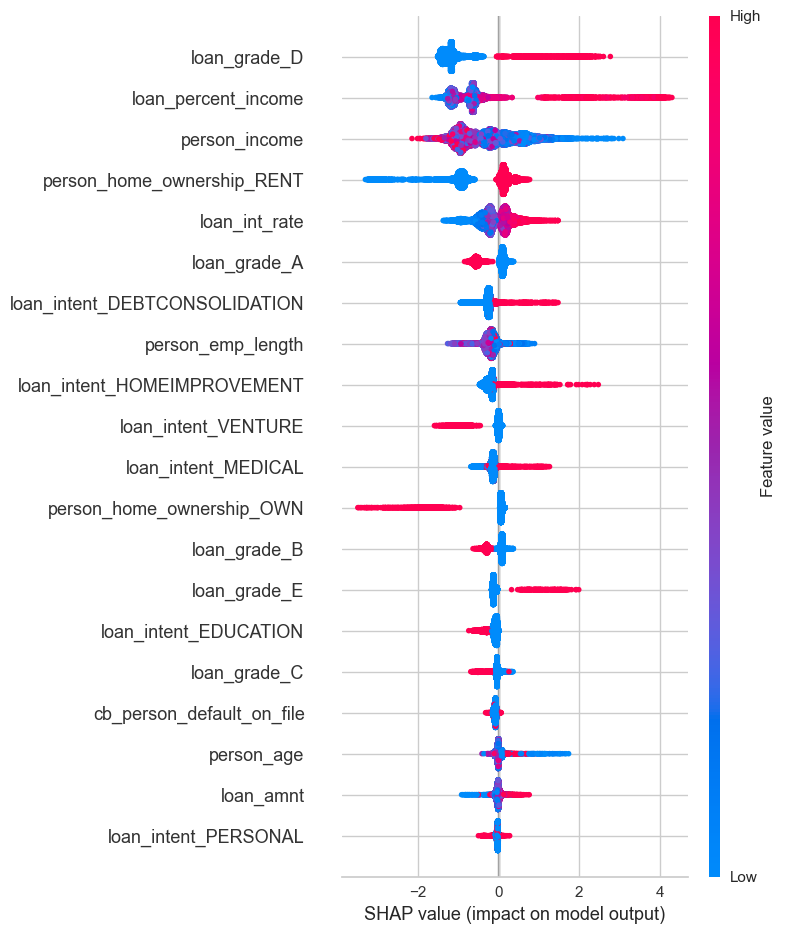

CPU times: total: 18.7 s
Wall time: 4.72 s


In [30]:
%%time

interpret_model(best_model)

In [33]:
%%time

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

CPU times: total: 766 ms
Wall time: 386 ms


In [31]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9524,0.9574,0.7305,0.9187,0.8139,0.7870,0.7938


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,prediction_label,prediction_score
27741,27741,31,80000,RENT,5.0,VENTURE,D,35000,15.65,0.46,Y,9,1,1,0.8093
10359,10359,25,42000,RENT,4.0,PERSONAL,C,3200,13.43,0.08,Y,4,0,0,0.9103
53842,53842,27,80000,RENT,3.0,HOMEIMPROVEMENT,C,9000,13.49,0.11,N,7,0,0,0.9782
51805,51805,22,30000,RENT,2.0,DEBTCONSOLIDATION,B,12000,10.99,0.40,N,2,1,1,0.9810
43820,43820,25,70000,MORTGAGE,9.0,VENTURE,A,5000,6.99,0.07,N,4,0,0,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1541,41,60000,RENT,23.0,VENTURE,A,10000,7.51,0.17,N,15,0,0,0.9957
46941,46941,23,55000,RENT,7.0,MEDICAL,B,4000,11.71,0.07,N,3,0,0,0.9565
45614,45614,37,32000,RENT,0.0,MEDICAL,B,5000,10.37,0.16,N,14,0,0,0.9221
54340,54340,22,49000,RENT,3.0,MEDICAL,E,20000,16.00,0.38,N,2,1,1,0.9930


#### EDA

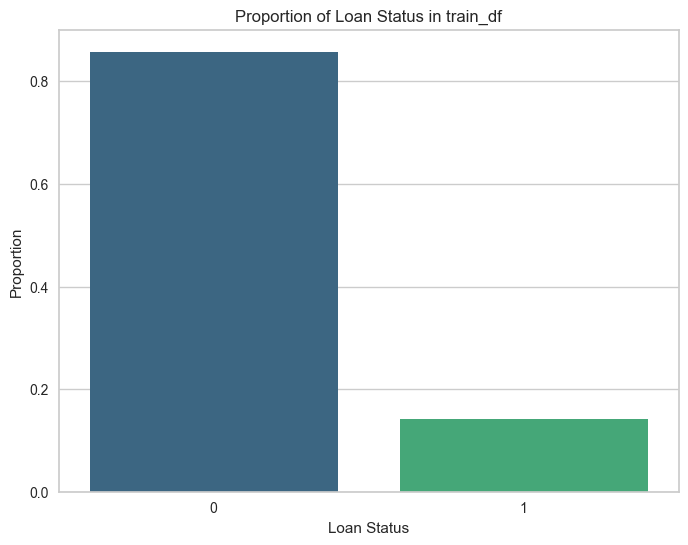

In [32]:
# 計算 loan_status 的比例
loan_status_counts = train_df['loan_status'].value_counts(normalize=True)
# 標示各類別的占比#
# 繪製條形圖
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title('Proportion of Loan Status in train_df')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()